# **EDA for Titanic Dataset**

### Load the Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.duplicated().sum()

0

### Data Cleaning

In [9]:
df["Age"].fillna(df["Age"].median(),inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_19864\860536840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(),inplace=True)


In [10]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_19864\548196730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)


In [11]:
# Drop columns that won't be used
df.drop(columns=['Cabin', 'Ticket'], inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Fare           891
Embarked       891
dtype: int64

### Detecting Outliers

In [28]:
sns.boxplot(x=df['Fare'])

<Axes: xlabel='Fare'>

In [32]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Fare'>

In [35]:
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

23.0896


In [37]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [39]:
dfff=df["Fare"]

In [41]:
d1 = dfff[~((dfff < (Q1 - 1.5 * IQR)) |(dfff > (Q3 + 1.5 * IQR)))]
d1.shape

(775,)

### Exploratory Data Analysis (EDA)

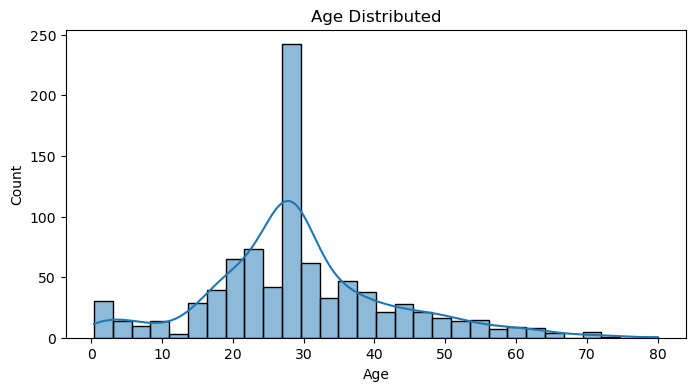

In [26]:
# Histogram for Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df["Age"],kde=True)
plt.title("Age Distributed")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

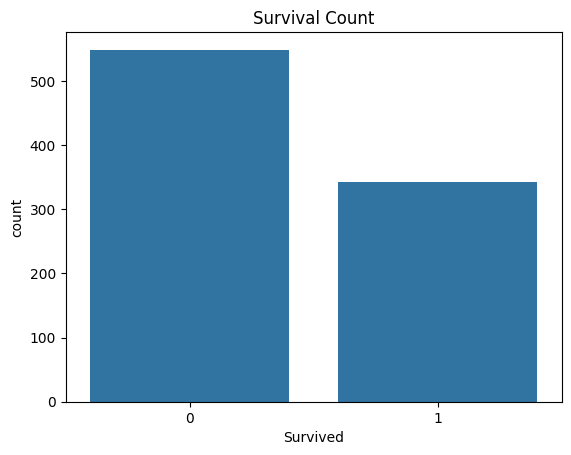

In [35]:
# Count plot for Survival Distribution
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

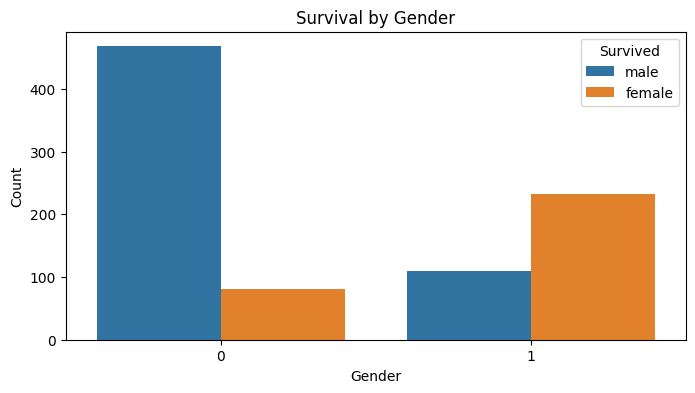

In [49]:
# Count plot for Relationship between Gender & Survival
plt.figure(figsize=(8,4))
sns.countplot(data=df,x="Survived",hue="Sex")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Survived",loc="upper right")
plt.show()

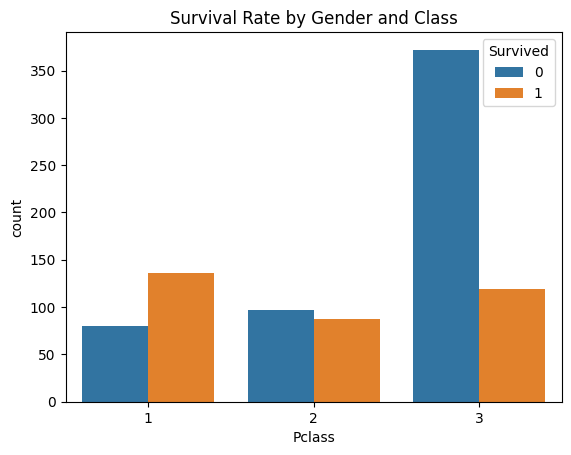

In [37]:
# Survival Rate by Gender and Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Gender and Class')
plt.show()

<ipython-input-45-e2643226b7e3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df,ci=None)


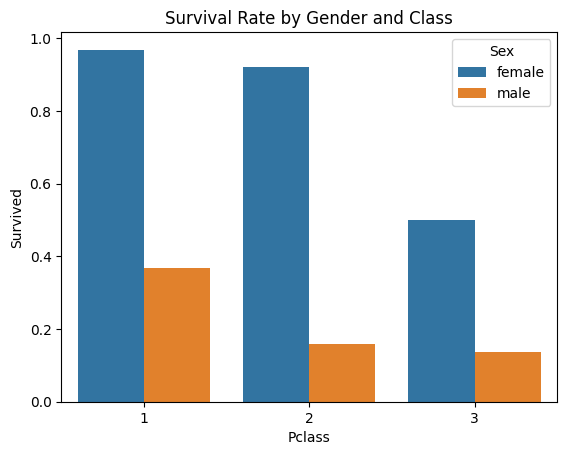

In [45]:
# Survival rate by gender and class
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ci=None)
plt.title('Survival Rate by Gender and Class')
plt.show()

<ipython-input-46-8922909f5bb5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df,ci=None)


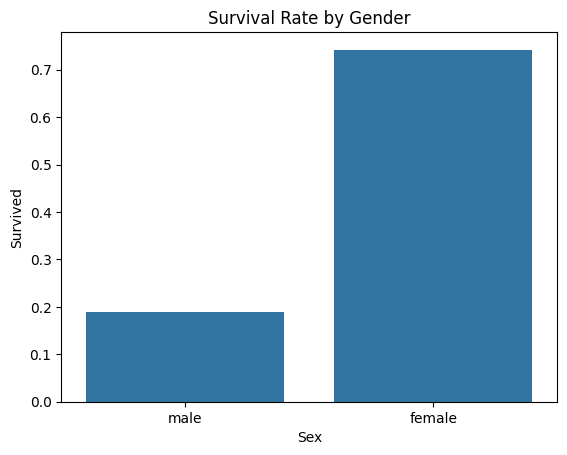

In [46]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Gender')
plt.show()

<ipython-input-47-20c4e0cbfc94>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df,ci=None)


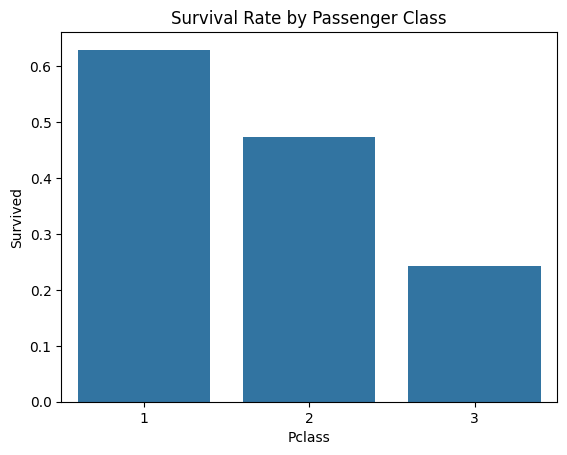

In [47]:
# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.show()

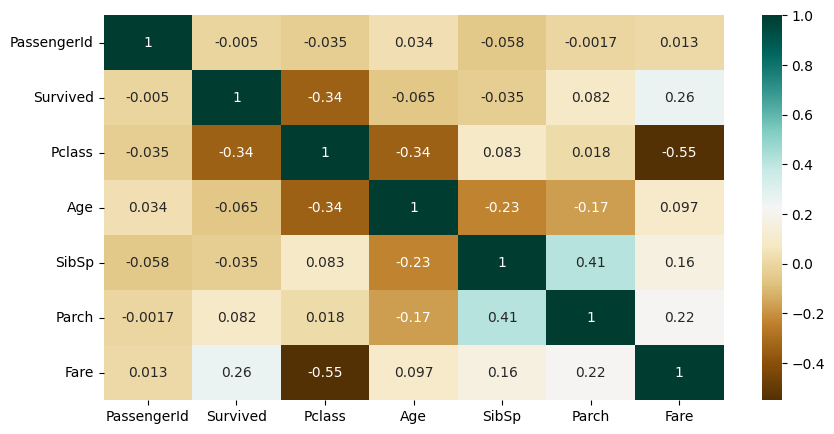

In [42]:
# Correlation heatmap
plt.figure(figsize=(10,5))
corr = df.select_dtypes(include=np.number).corr() ## Select only numeric columns for correlation
sns.heatmap(corr, annot=True, cmap="BrBG")
plt.show()

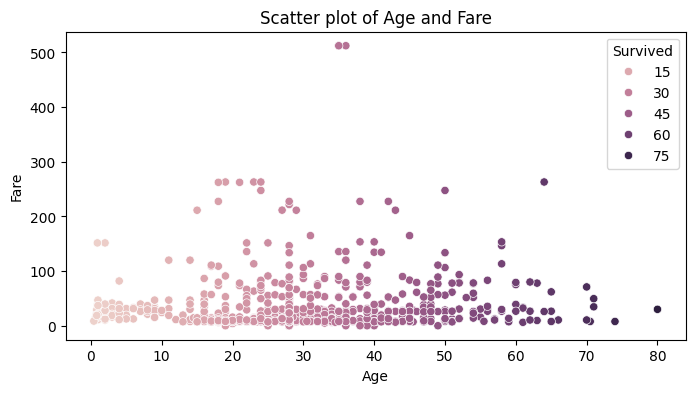

In [43]:
# Scatterplot for Age and Fare
plt.figure(figsize=(8,4))
sns.scatterplot(data=df,x="Age",y="Fare", hue="Age")
plt.title("Scatter plot of Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="Survived")
plt.show()